In [1]:
"""
This code is designed to plot the star formation rate vs stellar mass of galaxies in different simulations,
as drawn from the catalogue of Melanie Habouzit
@author: clara
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import os

c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


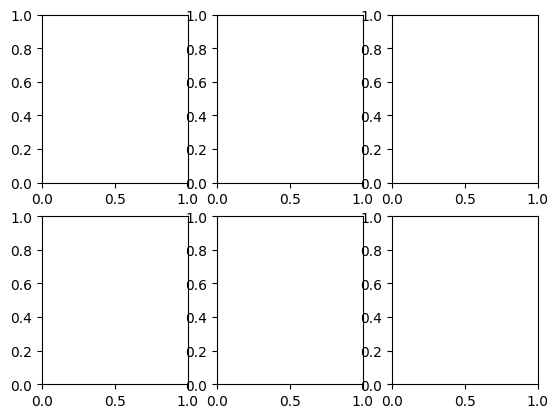

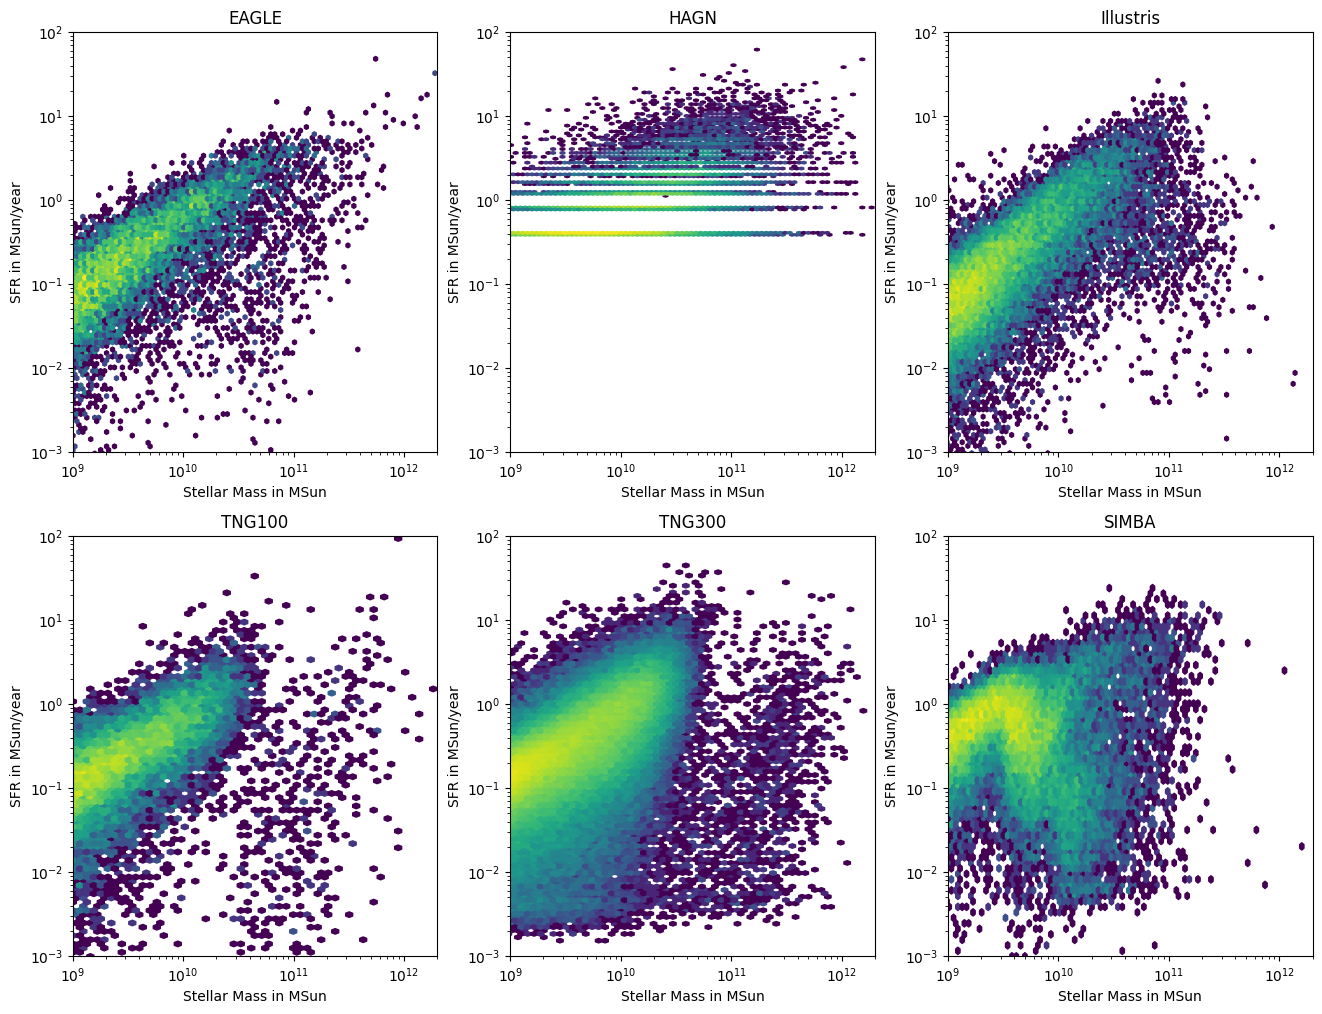

In [2]:
#observations
"""
df_data = pd.read_csv("../..\Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_sfr = 10**df_data['SFR'].to_numpy()
    
"""
#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])
snapshot_num = np.array([28,761,135,99,99,151])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['SFR'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    axes[i][j].hexbin(stellar_mass, sfr, bins = 'log',xscale='log', yscale='log')
    axes[i][j].set_xlabel(r'Stellar Mass in MSun')
    axes[i][j].set_xlim([10**9, 2*10**12])
    axes[i][j].set_ylim([10**(-3), 10**2])
    axes[i][j].set_ylabel(r'SFR in MSun/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3


plt.savefig('Figures/stellarMass_vs_sfr')
plt.show()

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3


C:\Users\clara\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


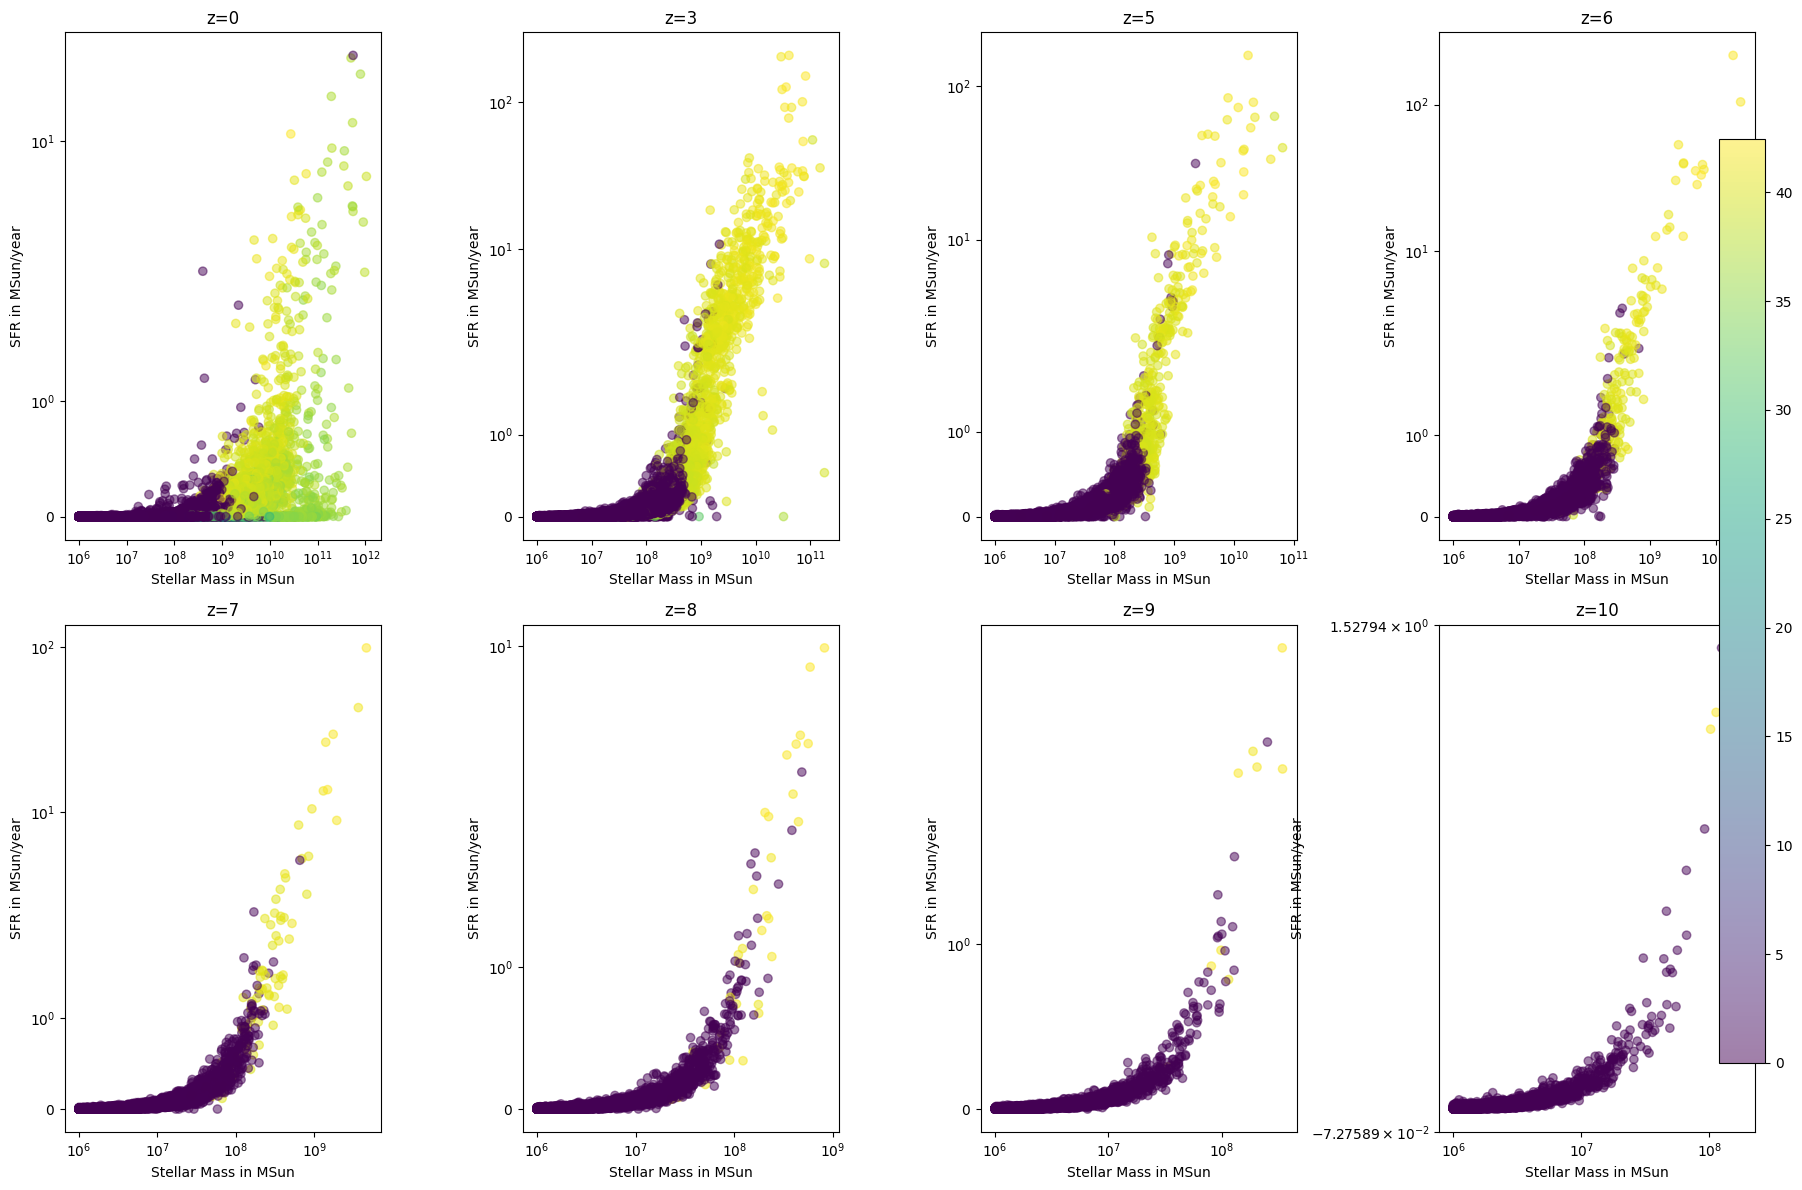

In [10]:
#observations
"""
df_data = pd.read_csv("../..\Observation Data\Data_observations_z0.txt",header=0,sep="\s+| |  ",
                       names=['stellar mass','massBH'])
data_stellar_mass = 10**df_data['stellar mass'].to_numpy()
data_sfr = 10**df_data['SFR'].to_numpy()
    
"""
#simulations

sim_list = np.array(['TNG50'])
snapshot_num = np.array([99,25,17,13,11,8,6,4])
snapshot_name = np.array(['z=0','z=3','z=5','z=6','z=7','z=8','z=9','z=10'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 4
rows = 2
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(22, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[0])+"/catalog_Habouzit_"+str(sim_list[0])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units_central.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','central','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['SFR'].to_numpy()
    lum = df['XrayLum'].to_numpy()


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    """ 
    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
        lum = np.delete(lum, np.where(zero_rows)[0])
    """
    
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    pcm = axes[i][j].scatter(stellar_mass, sfr, c=lum, alpha = 0.5)
    axes[i][j].set_xlabel(r'Stellar Mass in MSun')
    #axes[i][j].set_xlim([10**9, 2*10**12])
    #axes[i][j].set_ylim([10**(-3), 10**2])
    axes[i][j].set_ylabel(r'SFR in MSun/year')
    axes[i][j].set_xscale('symlog')
    axes[i][j].set_yscale('symlog')
    axes[i][j].set_title(str(snapshot_name[x]))
    #axes[i][j].legend()
    print(i,j)
    x += 1
    j += 1
    if x == 4:
        i +=1
        j = j-4
    

fig.colorbar(pcm, ax=axes)
fig.tight_layout()
fig.subplots_adjust(right=0.8)
plt.savefig('Figures/stellarMass_vs_sfr_tng50')
plt.show()

    paper  redshift  mstar  mstar min  mstar max     sfr  sfr min  sfr max
47      1     4.380  10.38       9.86      10.60  208.93    56.24   676.08
48      1     4.280  10.64      10.24      10.78  151.36    37.16   436.52
49      1     4.070  11.18      10.64      11.38  891.25   316.23  2041.65
50      1     3.970  11.01      10.52      11.21  691.83   239.88  1621.81
51      1     3.830  10.55      10.28      10.65  213.80   213.80   776.25
52      1     3.780  11.00      10.49      11.19  588.84   194.98  1584.89
53      1     3.780  10.97      10.40      11.16  407.38   120.23  1584.89
54      1     3.631   7.89       7.85       7.93   51.00    41.00    58.00
55      1     3.620  10.55       9.90      10.71  151.36     3.98   602.56
56      1     3.580  11.05      10.54      11.29  891.25   489.78  1230.27
57      1     3.580  10.92      10.48      11.09  549.54   218.78  1202.26
58      1     3.580  11.19      10.69      11.35  467.73   173.77   891.25
76      3     4.490   9.5

c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


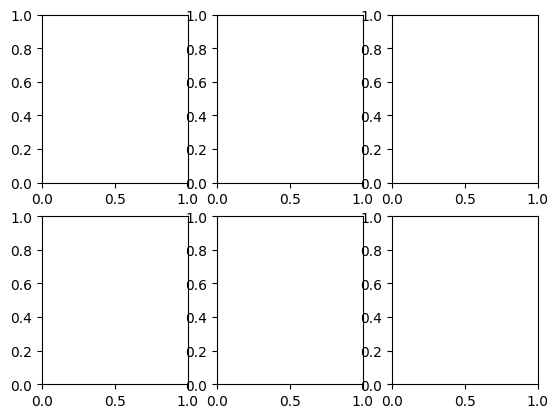

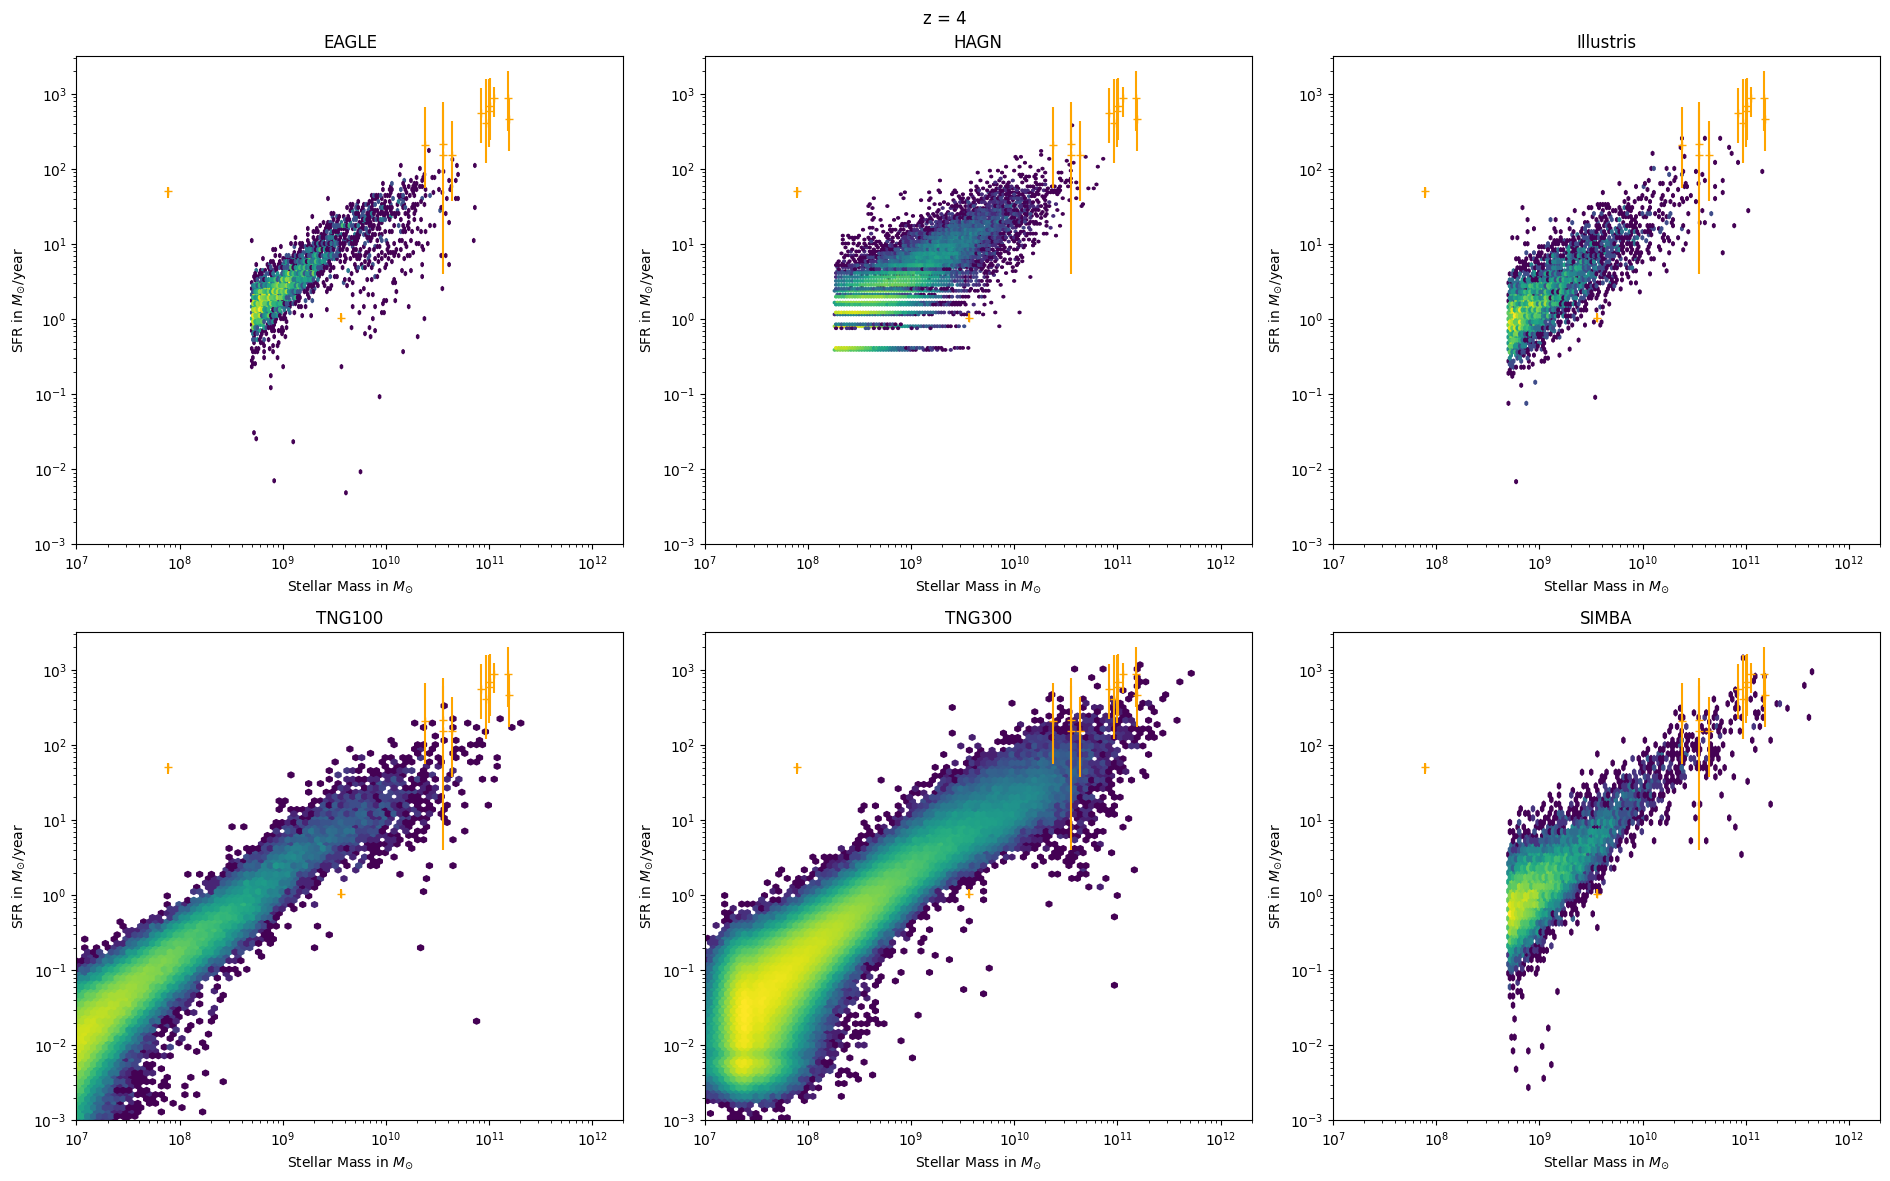

In [12]:
#observations

data = pd.read_csv("../..\Observation Data\data_mstar_sfr.txt",header=0,sep="\s+| |  ",
                       names=['paper','redshift','mstar','mstar min','mstar max','sfr','sfr min','sfr max'], skiprows=9)


#rslt_df = dataframe.loc[dataframe['Percentage'] > 80]
df_data = data.loc[data['redshift'] < 4.5]
df_data = df_data.loc[df_data['redshift'] > 3.5]
print(df_data)
df_data['sfr'].loc[df_data['paper'] == 0] = 10**(df_data['sfr'])
df_data['sfr'].loc[df_data['paper'] == 5] = 10**(df_data['sfr'])
df_data['sfr min'].loc[df_data['paper'] == 0] = 10**(df_data['sfr min'])
df_data['sfr min'].loc[df_data['paper'] == 5] = 10**(df_data['sfr min'])
df_data['sfr max'].loc[df_data['paper'] == 0] = 10**(df_data['sfr max'])
df_data['sfr max'].loc[df_data['paper'] == 5] = 10**(df_data['sfr max'])
data_stellar_mass = 10**df_data['mstar'].to_numpy()


data_sfr = df_data['sfr'].to_numpy()
data_redshift = df_data['redshift'].to_numpy()

data_x_err = [df_data['mstar'].to_numpy()-df_data['mstar min'].to_numpy(),df_data['mstar max'].to_numpy()-df_data['mstar'].to_numpy()]
data_y_err = [df_data['sfr'].to_numpy()-df_data['sfr min'].to_numpy(),df_data['sfr max'].to_numpy()-df_data['sfr'].to_numpy()]

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])

#z=0
#snapshot_num = np.array([28,761,135,99,99,151])

#z=4
snapshot_num = np.array([10,97,54,21,21,50])
#z=5
#snapshot_num = np.array([8,70,49,17,17,42])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(19, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['SFR'].to_numpy()
    


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    axes[i][j].hexbin(stellar_mass, sfr,bins = 'log',xscale='log', yscale='log')
    #pcm = axes[i][j].errorbar(data_stellar_mass, data_sfr, colors=data_redshift, xerr=data_x_err, yerr=data_y_err, cmap='autumn')
    axes[i][j].errorbar(data_stellar_mass, data_sfr, marker='+', xerr=data_x_err, yerr=data_y_err,ls='none',color='orange')
    #axes[i][j].errorbar(data_stellar_mass, data_sfr)
    axes[i][j].set_xlabel(r'Stellar Mass in $M_{\odot}$')
    axes[i][j].set_xlim([10**7, 2*10**12])
    axes[i][j].set_ylim([10**(-3), 10**(3.5)])
    axes[i][j].set_ylabel(r'SFR in $M_{\odot}$/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(snapshot_num[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3

#fig.colorbar(pcm, ax=axes)

fig.suptitle('z = 4')
fig.tight_layout()
#plt.title('z = 4')
plt.savefig('Figures/stellarMass_vs_sfr_z-4')
plt.show()

    paper  redshift  mstar  mstar min  mstar max     sfr  sfr min  sfr max
34      1      5.30  10.40      10.10      10.70   64.70    64.70    64.70
35      1      5.29  10.20       9.90      10.50   48.00    48.00    48.00
36      1      5.25   9.96       9.66      10.26   27.00    27.00    27.00
37      1      5.22  10.90      10.51      11.03  416.87    77.63  1174.90
38      1      5.14   9.89       9.59      10.19   23.50    23.50    23.50
39      1      4.78  10.97      10.55      11.12  602.56   169.82  1862.09
40      1      4.78  10.64      10.42      10.69  794.33   346.74  1584.89
41      1      4.68  10.42       9.87      10.64  229.10    60.26   691.83
42      1      4.68  10.36       9.81      10.58  194.98    50.12   616.59
43      1      4.68  10.43       9.89      10.65  234.42    64.56   724.43
44      1      4.62  10.36       9.81      10.59  199.53    53.71   616.60
45      1      4.57  10.21       9.66      10.44  131.83    32.36   426.58
46      1      4.57  10.2

c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


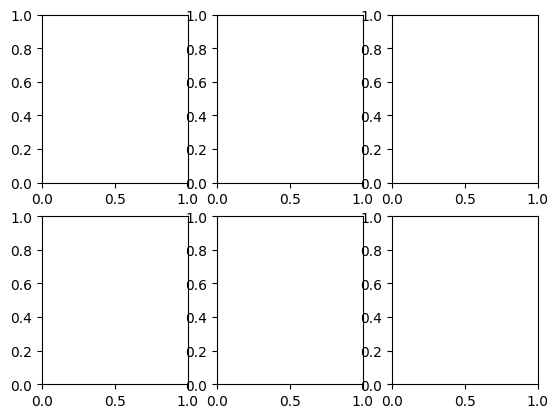

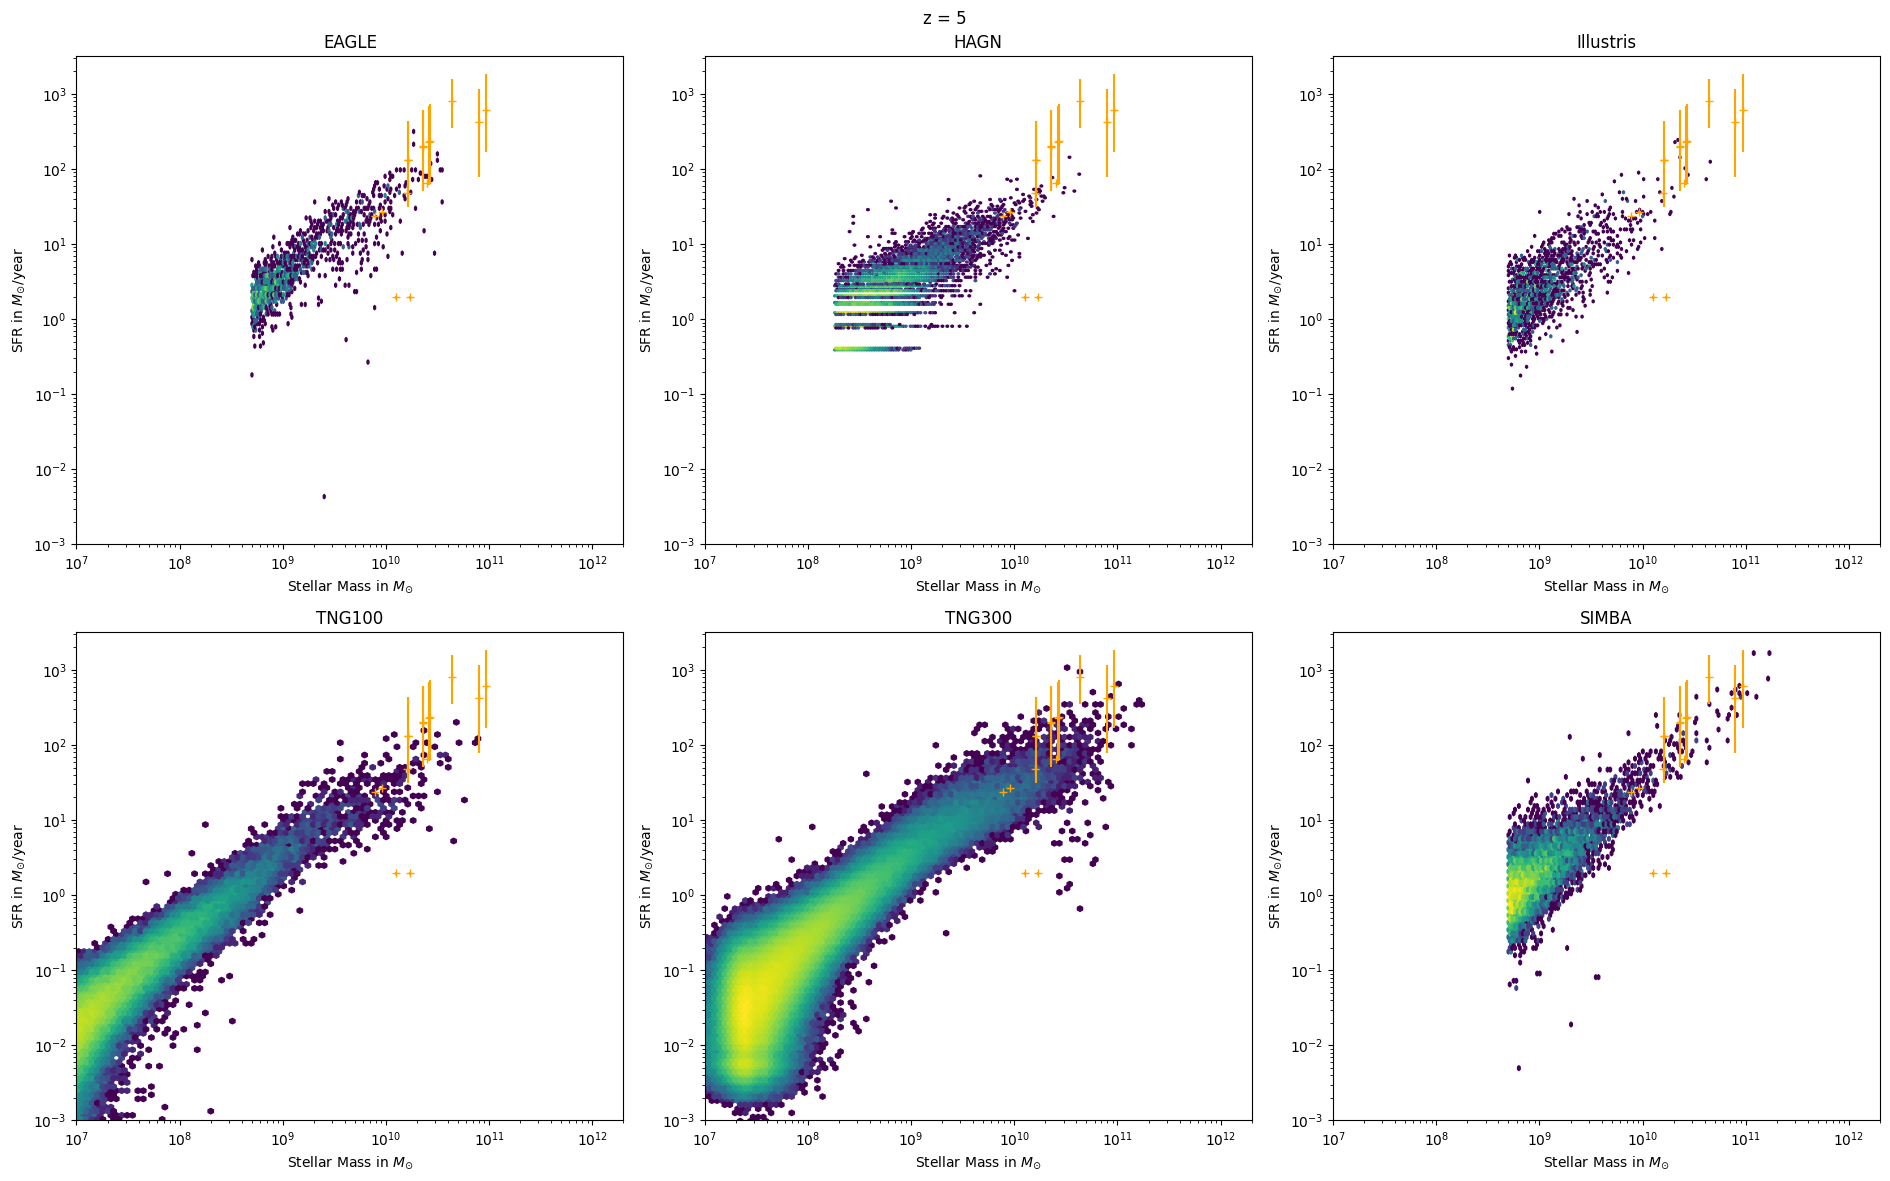

In [14]:
#observations

data = pd.read_csv("../..\Observation Data\data_mstar_sfr.txt",header=0,sep="\s+| |  ",
                       names=['paper','redshift','mstar','mstar min','mstar max','sfr','sfr min','sfr max'], skiprows=9)


#rslt_df = dataframe.loc[dataframe['Percentage'] > 80]
df_data = data.loc[data['redshift'] < 5.5]
df_data = df_data.loc[df_data['redshift'] > 4.5]
print(df_data)
df_data['sfr'].loc[df_data['paper'] == 0] = 10**(df_data['sfr'])
df_data['sfr'].loc[df_data['paper'] == 5] = 10**(df_data['sfr'])
df_data['sfr min'].loc[df_data['paper'] == 0] = 10**(df_data['sfr min'])
df_data['sfr min'].loc[df_data['paper'] == 5] = 10**(df_data['sfr min'])
df_data['sfr max'].loc[df_data['paper'] == 0] = 10**(df_data['sfr max'])
df_data['sfr max'].loc[df_data['paper'] == 5] = 10**(df_data['sfr max'])
data_stellar_mass = 10**df_data['mstar'].to_numpy()


data_sfr = df_data['sfr'].to_numpy()
data_redshift = df_data['redshift'].to_numpy()

data_x_err = [df_data['mstar'].to_numpy()-df_data['mstar min'].to_numpy(),df_data['mstar max'].to_numpy()-df_data['mstar'].to_numpy()]
data_y_err = [df_data['sfr'].to_numpy()-df_data['sfr min'].to_numpy(),df_data['sfr max'].to_numpy()-df_data['sfr'].to_numpy()]

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])

#z=0
#snapshot_num = np.array([28,761,135,99,99,151])

#z=4
#snapshot_num = np.array([10,97,54,21,21,50])
#z=5
snapshot_num = np.array([8,70,49,17,17,42])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(19, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['SFR'].to_numpy()
    


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    axes[i][j].hexbin(stellar_mass, sfr,bins = 'log',xscale='log', yscale='log')
    #pcm = axes[i][j].errorbar(data_stellar_mass, data_sfr, colors=data_redshift, xerr=data_x_err, yerr=data_y_err, cmap='autumn')
    axes[i][j].errorbar(data_stellar_mass, data_sfr, marker='+', xerr=data_x_err, yerr=data_y_err,ls='none',color='orange')
    #axes[i][j].errorbar(data_stellar_mass, data_sfr)
    axes[i][j].set_xlabel(r'Stellar Mass in $M_{\odot}$')
    axes[i][j].set_xlim([10**7, 2*10**12])
    axes[i][j].set_ylim([10**(-3), 10**3.5])
    axes[i][j].set_ylabel(r'SFR in $M_{\odot}$/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3

#fig.colorbar(pcm, ax=axes)

fig.suptitle('z = 5')
fig.tight_layout()
#plt.title('z = 4')
plt.savefig('Figures/stellarMass_vs_sfr_z-5')
plt.show()

    paper  redshift  mstar  mstar min  mstar max      sfr  sfr min  sfr max
24      1     6.340  10.70      10.70      10.70  1320.00  1320.00  1320.00
25      1     6.120  10.59      10.34      10.61  1380.38   689.83  1905.46
26      1     5.820  10.90      10.54      11.09   549.54   134.90  1412.54
27      1     5.690  10.00       9.70      10.30    31.70    31.70    31.70
28      1     5.670  10.00       9.70      10.30    32.40    32.40    32.40
29      1     5.660  10.30      10.00      10.30    50.12    50.12    50.12
30      1     5.550   9.89       9.59      10.19    23.50    23.50    23.50
31      1     5.550   9.79       9.49      10.09    23.50    23.50    23.50
32      1     5.680  10.74      10.26      10.91   436.51   114.82  1202.26
33      1     5.540  10.20       9.90      10.50    40.80    40.80    40.80
60      2     6.381   7.50       7.47       7.53     0.32     0.29     0.35
71      3     6.240   9.95       9.84      10.03     1.26     1.07     1.42
72      3   

c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


[-1. -1. -1. ... -1. -1. -1.]


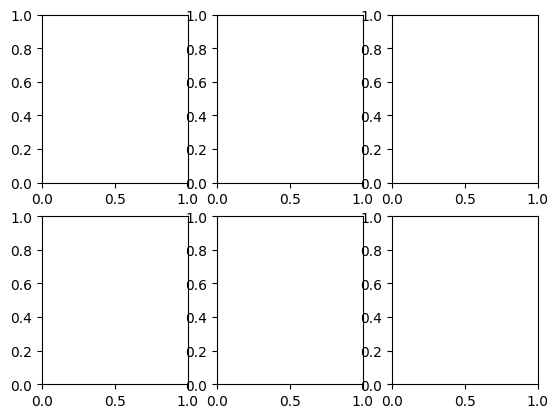

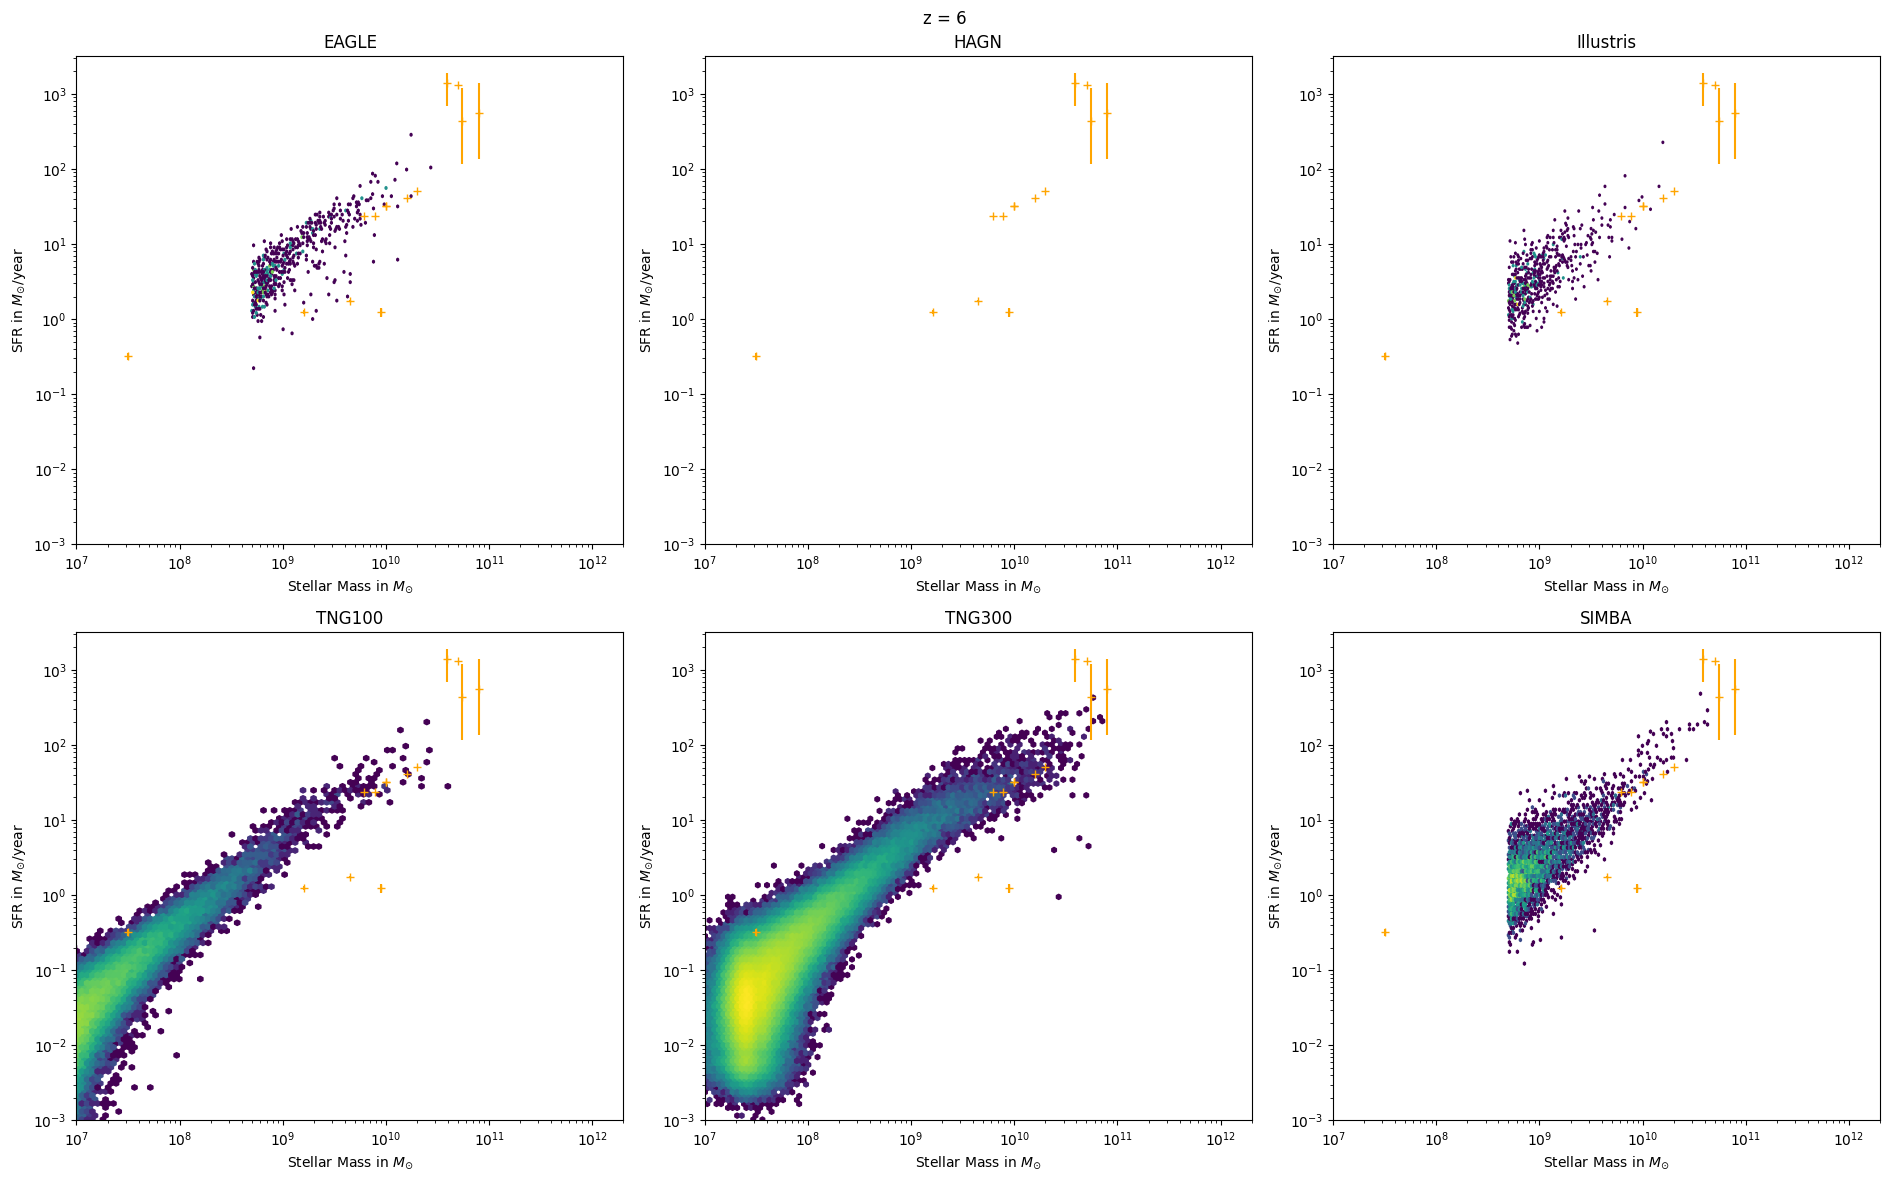

In [19]:
#observations

data = pd.read_csv("../..\Observation Data\data_mstar_sfr.txt",header=0,sep="\s+| |  ",
                       names=['paper','redshift','mstar','mstar min','mstar max','sfr','sfr min','sfr max'], skiprows=9)


#rslt_df = dataframe.loc[dataframe['Percentage'] > 80]
df_data = data.loc[data['redshift'] < 6.5]
df_data = df_data.loc[df_data['redshift'] > 5.5]
print(df_data)
df_data['sfr'].loc[df_data['paper'] == 0] = 10**(df_data['sfr'])
df_data['sfr'].loc[df_data['paper'] == 5] = 10**(df_data['sfr'])
df_data['sfr min'].loc[df_data['paper'] == 0] = 10**(df_data['sfr min'])
df_data['sfr min'].loc[df_data['paper'] == 5] = 10**(df_data['sfr min'])
df_data['sfr max'].loc[df_data['paper'] == 0] = 10**(df_data['sfr max'])
df_data['sfr max'].loc[df_data['paper'] == 5] = 10**(df_data['sfr max'])
data_stellar_mass = 10**df_data['mstar'].to_numpy()


data_sfr = df_data['sfr'].to_numpy()
data_redshift = df_data['redshift'].to_numpy()

data_x_err = [df_data['mstar'].to_numpy()-df_data['mstar min'].to_numpy(),df_data['mstar max'].to_numpy()-df_data['mstar'].to_numpy()]
data_y_err = [df_data['sfr'].to_numpy()-df_data['sfr min'].to_numpy(),df_data['sfr max'].to_numpy()-df_data['sfr'].to_numpy()]

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])

#z=0
#snapshot_num = np.array([28,761,135,99,99,151])

#z=6
snapshot_num = np.array([6,43,45,13,13,36])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(19, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['SFR'].to_numpy()
    if x == 1:
        print(sfr)
    


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    axes[i][j].hexbin(stellar_mass, sfr,bins = 'log',xscale='log', yscale='log')
    #pcm = axes[i][j].errorbar(data_stellar_mass, data_sfr, colors=data_redshift, xerr=data_x_err, yerr=data_y_err, cmap='autumn')
    axes[i][j].errorbar(data_stellar_mass, data_sfr, marker='+', xerr=data_x_err, yerr=data_y_err,ls='none',color='orange')
    #axes[i][j].errorbar(data_stellar_mass, data_sfr)
    axes[i][j].set_xlabel(r'Stellar Mass in $M_{\odot}$')
    axes[i][j].set_xlim([10**7, 2*10**12])
    axes[i][j].set_ylim([10**(-3), 10**3.5])
    axes[i][j].set_ylabel(r'SFR in $M_{\odot}$/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3

#fig.colorbar(pcm, ax=axes)

fig.suptitle('z = 6')
fig.tight_layout()
#plt.title('z = 4')
plt.savefig('Figures/stellarMass_vs_sfr_z-6')
plt.show()

    paper  redshift   mstar  mstar min  mstar max     sfr  sfr min  sfr max
15      1    7.1700   8.890     8.8500      8.900  200.00   161.00   282.00
16      1    7.1090   9.300     9.0000      9.600    5.70     5.70     5.70
17      1    7.0080   9.300     9.0000      9.600    6.00     6.00     6.00
18      1    6.9600   9.700     9.4000     10.000   20.40    16.30    20.40
19      1    6.9000  10.540    10.3000     10.690   13.00    13.00   715.00
20      1    6.8440   9.800     9.5000     10.100   15.40    15.40    15.40
21      1    6.8000   9.200     8.9000      9.500    9.00     9.00    13.80
22      1    6.5950   9.800     9.5000     10.100   32.30    11.40    32.30
23      1    6.5600   9.500     9.2000      9.800   13.70    13.70    24.50
66      3    7.2000   9.600     9.5000      9.750    1.64     1.55     1.72
67      3    7.1900   9.980     9.8700     10.110    1.82     1.67     1.72
68      3    7.1700   9.720     9.6700      9.800    1.80     1.76     1.86
69      3   

c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


[-1. -1. -1. ... -1. -1. -1.]


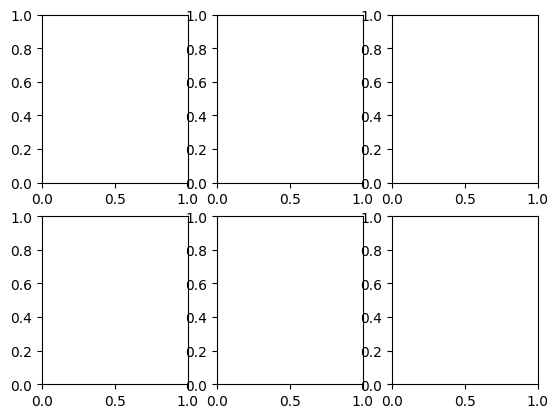

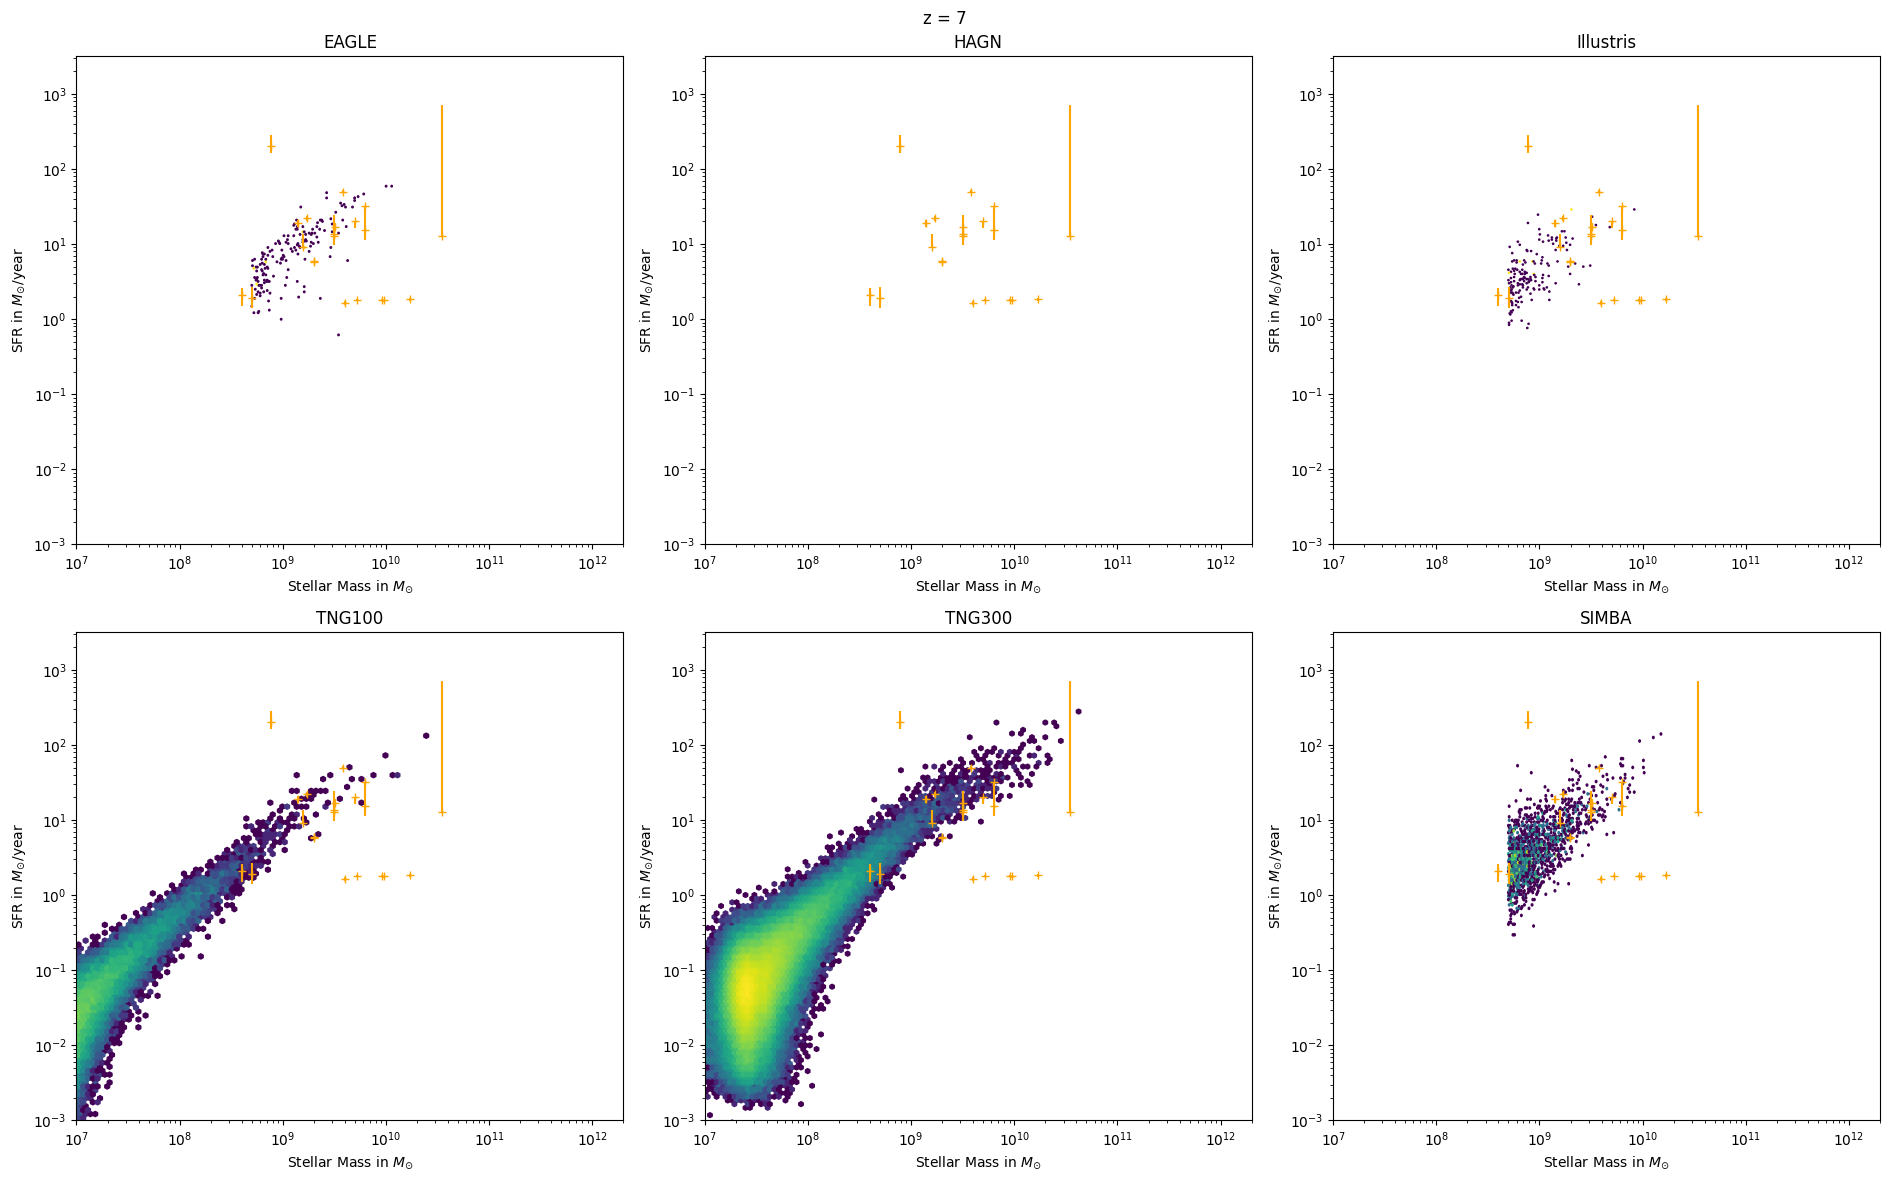

In [20]:
#observations

data = pd.read_csv("../..\Observation Data\data_mstar_sfr.txt",header=0,sep="\s+| |  ",
                       names=['paper','redshift','mstar','mstar min','mstar max','sfr','sfr min','sfr max'], skiprows=9)


#rslt_df = dataframe.loc[dataframe['Percentage'] > 80]
df_data = data.loc[data['redshift'] < 7.5]
df_data = df_data.loc[df_data['redshift'] > 6.5]
print(df_data)
df_data['sfr'].loc[df_data['paper'] == 0] = 10**(df_data['sfr'])
df_data['sfr'].loc[df_data['paper'] == 5] = 10**(df_data['sfr'])
df_data['sfr min'].loc[df_data['paper'] == 0] = 10**(df_data['sfr min'])
df_data['sfr min'].loc[df_data['paper'] == 5] = 10**(df_data['sfr min'])
df_data['sfr max'].loc[df_data['paper'] == 0] = 10**(df_data['sfr max'])
df_data['sfr max'].loc[df_data['paper'] == 5] = 10**(df_data['sfr max'])
data_stellar_mass = 10**df_data['mstar'].to_numpy()


data_sfr = df_data['sfr'].to_numpy()
data_redshift = df_data['redshift'].to_numpy()

data_x_err = [df_data['mstar'].to_numpy()-df_data['mstar min'].to_numpy(),df_data['mstar max'].to_numpy()-df_data['mstar'].to_numpy()]
data_y_err = [df_data['sfr'].to_numpy()-df_data['sfr min'].to_numpy(),df_data['sfr max'].to_numpy()-df_data['sfr'].to_numpy()]

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])

#z=0
#snapshot_num = np.array([28,761,135,99,99,151])

#z=6
snapshot_num = np.array([5,43,41,11,11,30])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(19, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['SFR'].to_numpy()
    if x == 1:
        print(sfr)
    


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    axes[i][j].hexbin(stellar_mass, sfr,bins = 'log',xscale='log', yscale='log')
    #pcm = axes[i][j].errorbar(data_stellar_mass, data_sfr, colors=data_redshift, xerr=data_x_err, yerr=data_y_err, cmap='autumn')
    axes[i][j].errorbar(data_stellar_mass, data_sfr, marker='+', xerr=data_x_err, yerr=data_y_err,ls='none',color='orange')
    #axes[i][j].errorbar(data_stellar_mass, data_sfr)
    axes[i][j].set_xlabel(r'Stellar Mass in $M_{\odot}$')
    axes[i][j].set_xlim([10**7, 2*10**12])
    axes[i][j].set_ylim([10**(-3), 10**3.5])
    axes[i][j].set_ylabel(r'SFR in $M_{\odot}$/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3

#fig.colorbar(pcm, ax=axes)

fig.suptitle('z = 7')
fig.tight_layout()
#plt.title('z = 4')
plt.savefig('Figures/stellarMass_vs_sfr_z-7')
plt.show()

    paper  redshift  mstar  mstar min  mstar max    sfr  sfr min  sfr max
8       0     8.480   9.90       9.50      10.30   1.40     1.00     1.80
11      1     8.382   9.29       9.12       9.54  20.00    10.50    37.60
12      1     8.312   8.38       8.36       8.49  55.00    50.20   230.00
13      1     7.508   9.70       9.40      10.00  23.40    23.40   113.00
59      2     8.497   8.46       8.18       8.74   2.18     1.31     3.05
61      2     7.664   8.69       8.60       8.78   4.94     3.94     5.94
62      2     7.659   7.97       7.87       8.07   0.94     0.69     1.19
63      3     8.190   9.91       9.74      10.07   1.87     1.73     2.02
64      3     7.960  10.02       9.95      10.10   2.07     2.01     2.13
65      3     7.940   9.32       9.25       9.42   1.37     1.31     1.43
78      4     8.000   8.20       7.70       8.40   1.10     0.60     1.50
80      4     7.700   8.60       8.40       8.80   4.50     2.90     6.40
82      4     8.400   7.90       7.90 

c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


[ 8.24802    17.743727   56.052673    3.9263752  36.06852     2.7360964
 16.442156    8.043362   20.371136    6.8771677   7.280527   13.091164
  4.222692    4.847889    9.38481     7.8747973   5.1537538   3.6082335
 17.166105    6.498572    3.2983968   5.905359    6.8108354   9.3146515
  5.5345078   1.9578748   3.846283    1.2780143   0.85427845  2.2788553
  4.0303783   1.8192668 ]
[6.03628207e+08 2.73551707e+09 2.84750311e+09 7.00657150e+08
 2.49351438e+09 6.44323247e+08 1.60505519e+09 1.10401687e+09
 1.07569969e+09 6.71948497e+08 1.24142876e+09 1.05437389e+09
 6.33235322e+08 1.41425058e+09 1.12833339e+09 6.58077294e+08
 1.16422391e+09 5.19291498e+08 8.63421486e+08 6.13775443e+08
 6.37544224e+08 8.25726417e+08 6.20918211e+08 6.74605676e+08
 7.54979397e+08 5.25697304e+08 5.19600316e+08 9.49312234e+08
 6.87950947e+08 7.02445660e+08 5.20097780e+08 5.69396864e+08]


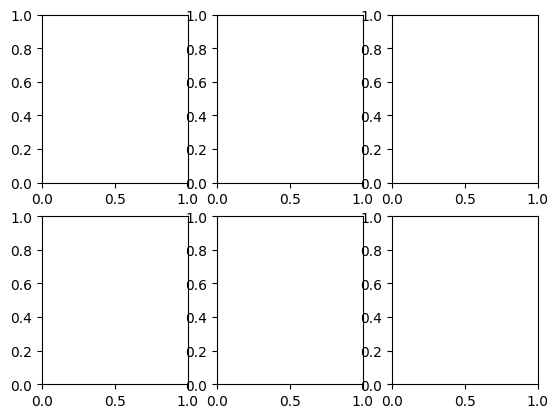

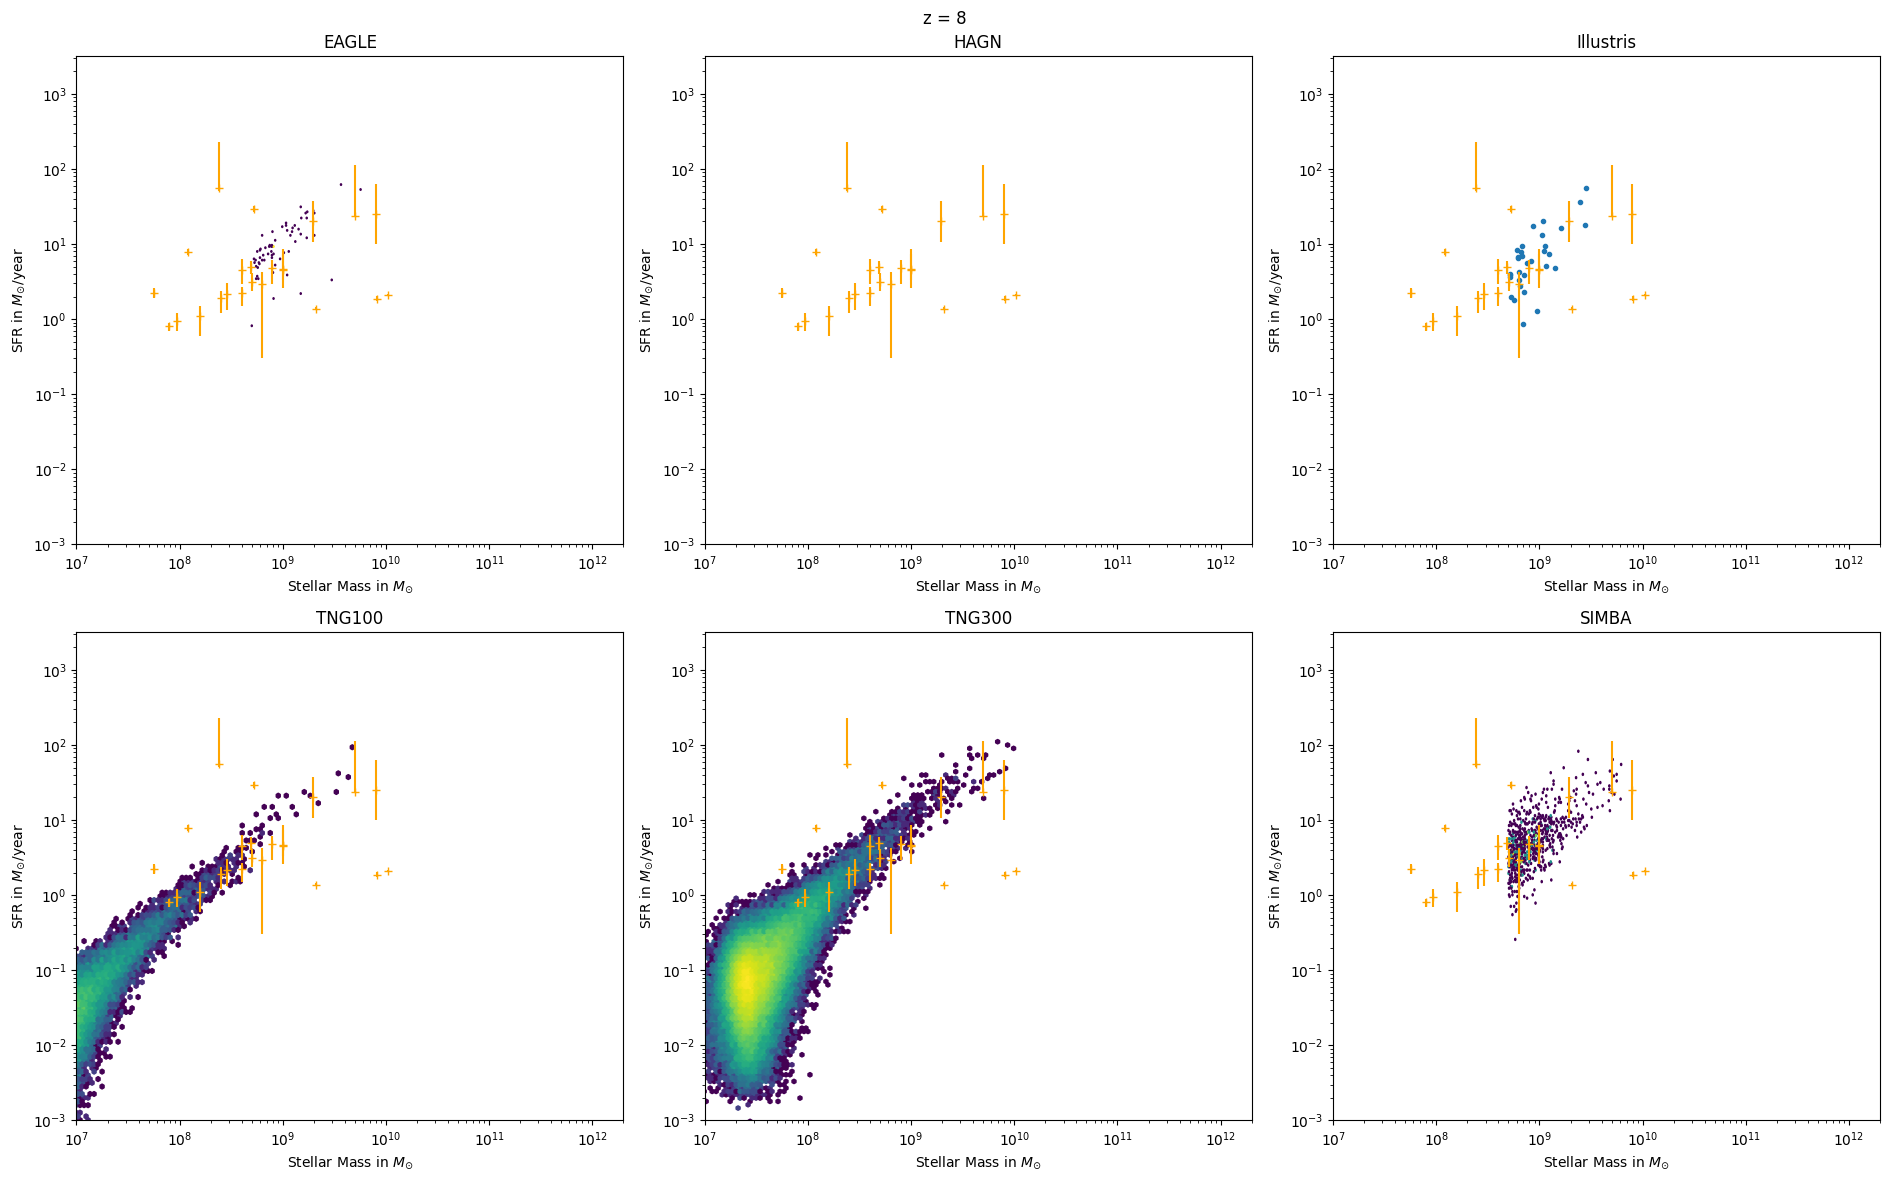

In [17]:
#observations

data = pd.read_csv("../..\Observation Data\data_mstar_sfr.txt",header=0,sep="\s+| |  ",
                       names=['paper','redshift','mstar','mstar min','mstar max','sfr','sfr min','sfr max'], skiprows=9)


#rslt_df = dataframe.loc[dataframe['Percentage'] > 80]
df_data = data.loc[data['redshift'] < 8.5]
df_data = df_data.loc[df_data['redshift'] > 7.5]
print(df_data)
df_data['sfr'].loc[df_data['paper'] == 0] = 10**(df_data['sfr'])
df_data['sfr'].loc[df_data['paper'] == 5] = 10**(df_data['sfr'])
df_data['sfr min'].loc[df_data['paper'] == 0] = 10**(df_data['sfr min'])
df_data['sfr min'].loc[df_data['paper'] == 5] = 10**(df_data['sfr min'])
df_data['sfr max'].loc[df_data['paper'] == 0] = 10**(df_data['sfr max'])
df_data['sfr max'].loc[df_data['paper'] == 5] = 10**(df_data['sfr max'])
data_stellar_mass = 10**df_data['mstar'].to_numpy()


data_sfr = df_data['sfr'].to_numpy()
data_redshift = df_data['redshift'].to_numpy()

data_x_err = [df_data['mstar'].to_numpy()-df_data['mstar min'].to_numpy(),df_data['mstar max'].to_numpy()-df_data['mstar'].to_numpy()]
data_y_err = [df_data['sfr'].to_numpy()-df_data['sfr min'].to_numpy(),df_data['sfr max'].to_numpy()-df_data['sfr'].to_numpy()]

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])

#z=0
#snapshot_num = np.array([28,761,135,99,99,151])

#z=6
snapshot_num = np.array([4,43,38,8,8,26])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(19, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['SFR'].to_numpy()
    
    


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    
    
    if x == 2:
        axes[i][j].plot(stellar_mass,sfr,'.')
        print(sfr)
        print(stellar_mass)
    else:
        axes[i][j].hexbin(stellar_mass, sfr,bins = 'log',xscale='log', yscale='log')
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    #axes[i][j].hexbin(stellar_mass,sfr,bins ='log',xscale='log', yscale='log')
    #pcm = axes[i][j].errorbar(data_stellar_mass, data_sfr, colors=data_redshift, xerr=data_x_err, yerr=data_y_err, cmap='autumn')
    axes[i][j].errorbar(data_stellar_mass, data_sfr, marker='+', xerr=data_x_err, yerr=data_y_err,ls='none',color='orange')
    #axes[i][j].errorbar(data_stellar_mass, data_sfr)
    axes[i][j].set_xlabel(r'Stellar Mass in $M_{\odot}$')
    axes[i][j].set_xlim([10**7, 2*10**12])
    axes[i][j].set_ylim([10**(-3), 10**3.5])
    axes[i][j].set_ylabel(r'SFR in $M_{\odot}$/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3

#fig.colorbar(pcm, ax=axes)

fig.suptitle('z = 8')
fig.tight_layout()
#plt.title('z = 4')
plt.savefig('Figures/stellarMass_vs_sfr_z-8')
plt.show()

c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\clara\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and diffe

    paper  redshift  mstar  mstar min  mstar max   sfr  sfr min  sfr max
0       0      9.77   10.9       10.7       11.1   2.5      2.2      2.8
1       0      9.83    9.3        8.9        9.6   1.0      0.8      1.3
4       0      9.16    9.1        8.8        9.3   1.0      0.8      1.2
6       0      9.06    9.6        9.3        9.9   1.3      1.0      1.6
7       0      9.40    9.7        9.3       10.0   1.4      1.1      1.7
9       0     10.96    9.1        8.9        9.4   1.1      0.9      1.3
10      0      9.54   11.0       10.8       11.4   1.7      1.1      2.3
98      7     10.60    9.4        9.1        9.7  12.0      6.0     21.0
[ 7.915491   6.1622224  6.0983586 10.554086 ]
[1.14471846e+09 5.05379616e+08 5.60705340e+08 9.55276160e+08]


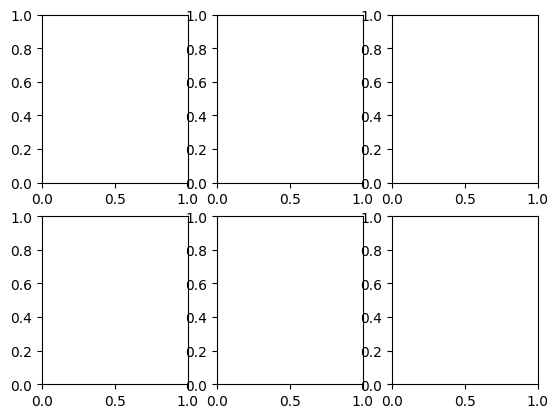

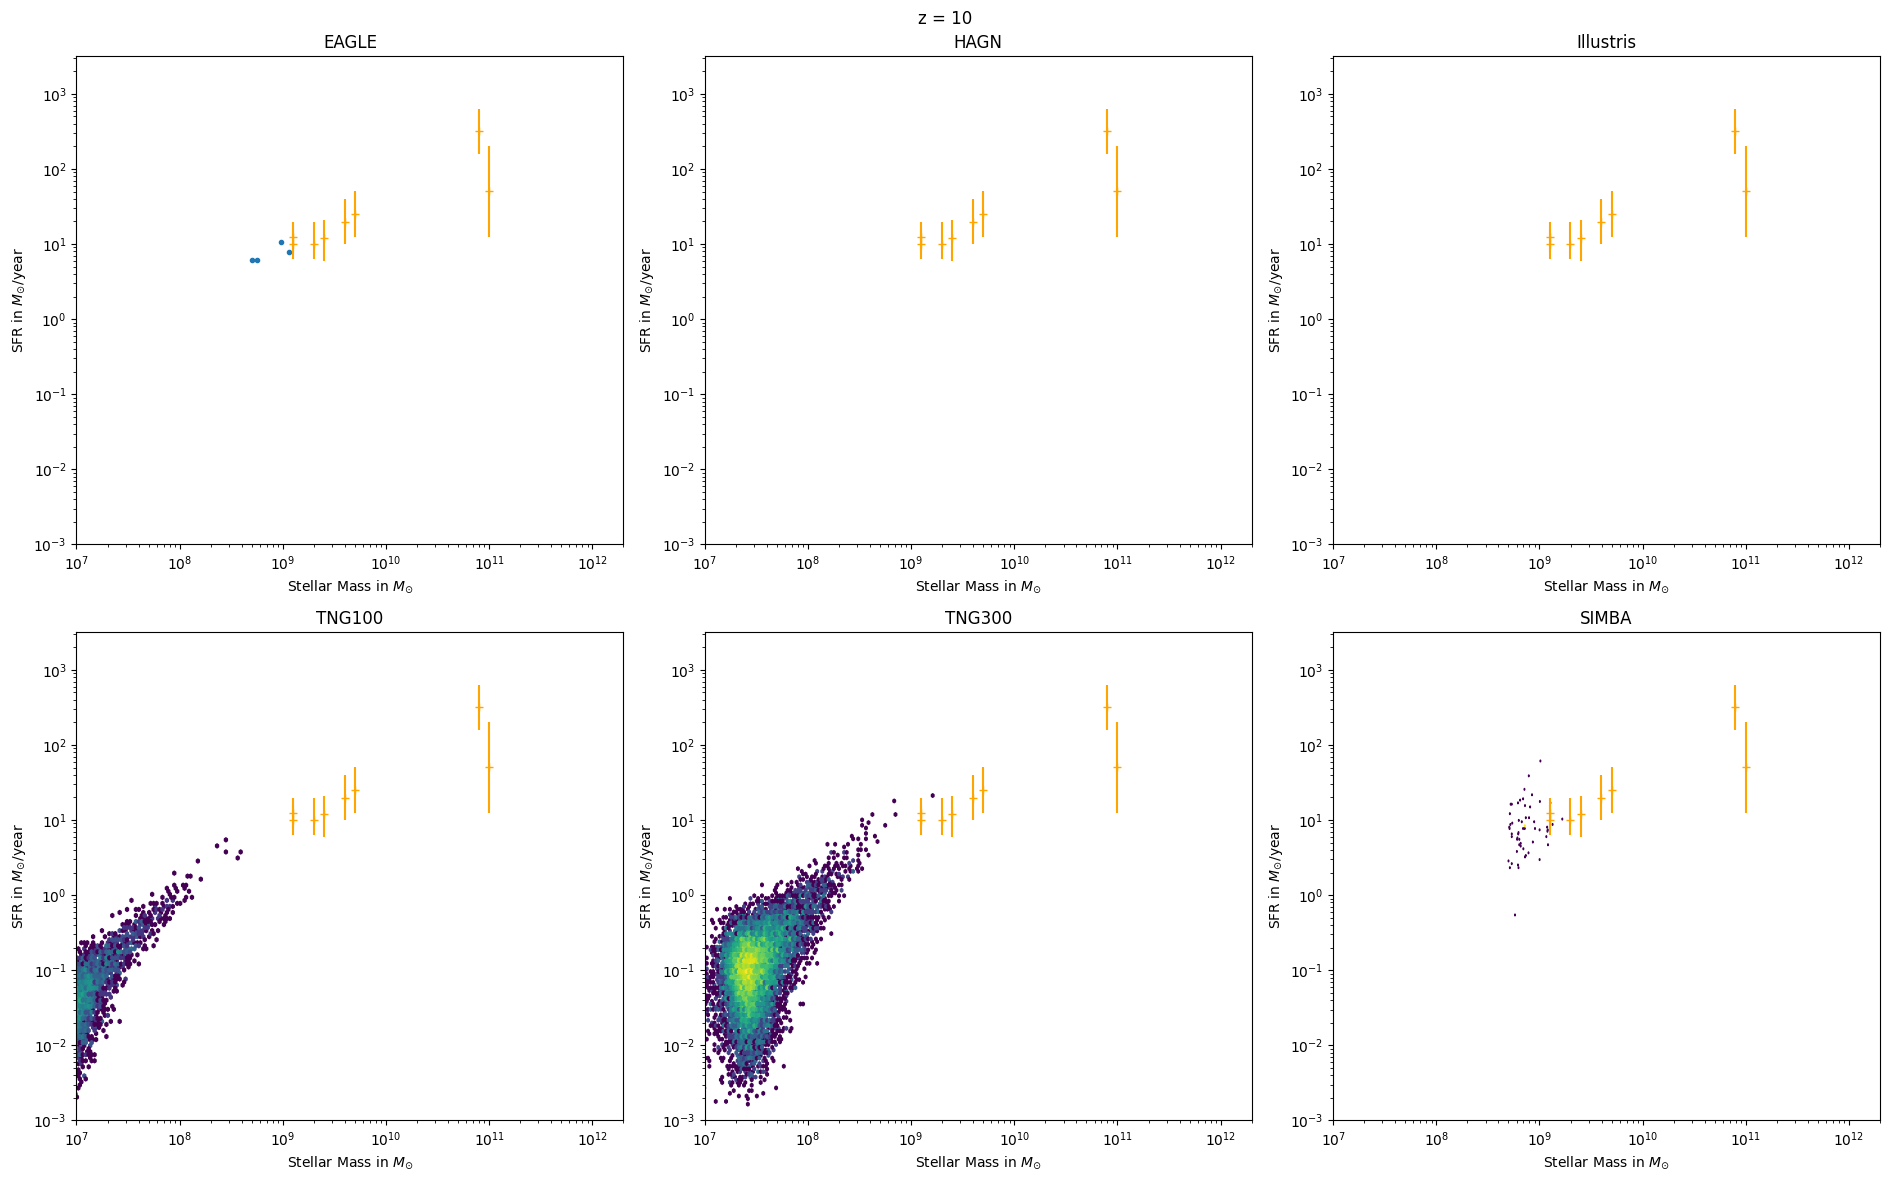

In [16]:
#observations

data = pd.read_csv("../..\Observation Data\data_mstar_sfr.txt",header=0,sep="\s+| |  ",
                       names=['paper','redshift','mstar','mstar min','mstar max','sfr','sfr min','sfr max'], skiprows=9)


#rslt_df = dataframe.loc[dataframe['Percentage'] > 80]
df_data = data.loc[data['redshift'] < 11]
df_data = df_data.loc[df_data['redshift'] > 9]
print(df_data)
df_data['sfr'].loc[df_data['paper'] == 0] = 10**(df_data['sfr'])
df_data['sfr'].loc[df_data['paper'] == 5] = 10**(df_data['sfr'])
df_data['sfr min'].loc[df_data['paper'] == 0] = 10**(df_data['sfr min'])
df_data['sfr min'].loc[df_data['paper'] == 5] = 10**(df_data['sfr min'])
df_data['sfr max'].loc[df_data['paper'] == 0] = 10**(df_data['sfr max'])
df_data['sfr max'].loc[df_data['paper'] == 5] = 10**(df_data['sfr max'])
data_stellar_mass = 10**df_data['mstar'].to_numpy()


data_sfr = df_data['sfr'].to_numpy()
data_redshift = df_data['redshift'].to_numpy()

data_x_err = [df_data['mstar'].to_numpy()-df_data['mstar min'].to_numpy(),df_data['mstar max'].to_numpy()-df_data['mstar'].to_numpy()]
data_y_err = [df_data['sfr'].to_numpy()-df_data['sfr min'].to_numpy(),df_data['sfr max'].to_numpy()-df_data['sfr'].to_numpy()]

#simulations

sim_list = np.array(['EAGLE','HAGN','Illustris','TNG100','TNG300','SIMBA'])

#z=0
#snapshot_num = np.array([28,761,135,99,99,151])

#z=6
snapshot_num = np.array([2,43,32,4,4,19])
#sim_list = np.array(['EAGLE'])
#snapshot_num = np.array([28])
filename = []
x = 0
cols = 3 
rows = 2
plt.subplots(2,3)
i = 0
j = 0
fig, axes = plt.subplots(rows, cols, figsize=(19, 12))
while x < len(snapshot_num):
    filename.append("../../Simulation Data/"+str(sim_list[x])+"/catalog_Habouzit_"+str(sim_list[x])+"_out_"+str(snapshot_num[x])+"_epsr01_correctlum_units.txt")
    
    df = pd.read_csv(filename[x],header=0,sep="\s+| |  ",
                       names=['redshift','stellar mass','radius','SFR','positionX', 'positionY', 'positionZ','noBH','massBH','BHdot','bolLum','XrayLum','sfr2','pos2'])
    
    stellar_mass = df['stellar mass'].to_numpy()
    sfr = df['SFR'].to_numpy()
    
    


    #axes[i][j].plot(stellar_mass, massBH, "+", label=str(sim_list[x]),color='orange')
    
    zero_rows = (sfr <= 0)

    if np.size(np.where(zero_rows)[0]) != 0:
        
        first_invalid = np.where(zero_rows)[0][0]
        sfr = np.delete(sfr, np.where(zero_rows)[0])
        stellar_mass = np.delete(stellar_mass, np.where(zero_rows)[0])
    
    if x == 0:
        axes[i][j].plot(stellar_mass,sfr,'.')
        print(sfr)
        print(stellar_mass)
    else:
        axes[i][j].hexbin(stellar_mass, sfr,bins = 'log',xscale='log', yscale='log')
    #axes[i][j].hexbin(data_stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha = 0.5)
    #axes[i][j].hexbin(stellar_mass, sfr,bins='log', xscale='log', yscale='log', alpha= 0.5, cmap='autumn')
    #axes[i][j].hexbin(stellar_mass, sfr,bins = 'log',xscale='log', yscale='log')
    #pcm = axes[i][j].errorbar(data_stellar_mass, data_sfr, colors=data_redshift, xerr=data_x_err, yerr=data_y_err, cmap='autumn')
    axes[i][j].errorbar(data_stellar_mass, data_sfr, marker='+', xerr=data_x_err, yerr=data_y_err,ls='none',color='orange')
    #axes[i][j].errorbar(data_stellar_mass, data_sfr)
    axes[i][j].set_xlabel(r'Stellar Mass in $M_{\odot}$')
    axes[i][j].set_xlim([10**7, 2*10**12])
    axes[i][j].set_ylim([10**(-3), 10**3.5])
    axes[i][j].set_ylabel(r'SFR in $M_{\odot}$/year')
    axes[i][j].set_xscale('log')
    axes[i][j].set_yscale('log')
    axes[i][j].set_title(str(sim_list[x]))
    #axes[i][j].legend()
    x += 1
    j += 1
    if x == 3:
        i +=1
        j = j-3

#fig.colorbar(pcm, ax=axes)

fig.suptitle('z = 10')
fig.tight_layout()
#plt.title('z = 4')
plt.savefig('Figures/stellarMass_vs_sfr_z-10')
plt.show()